# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**.

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [2]:
data = pd.read_csv('/content/drive/MyDrive/1 Dev/3 Personal Projects /data_science_py/data_science_7/cost_revenue_dirty.csv')

In [4]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [5]:
# Check the number of rows and columns
rows, cols = data.shape
print(f'The dataset contains {rows} rows and {cols} columns.')


The dataset contains 5391 rows and 6 columns.


In [6]:
# Check for NaN values
nan_values = data.isna().sum()
print('NaN values in each column:')
print(nan_values[nan_values > 0])


NaN values in each column:
Series([], dtype: int64)


In [7]:
# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
print(f'There are {duplicate_rows} duplicate rows in the dataset.')


There are 0 duplicate rows in the dataset.


In [8]:
# Check the data types of the columns
data_types = data.dtypes
print('Data types of the columns:')
print(data_types)


Data types of the columns:
Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [17]:
# Remove dollar signs and commas, convert to float
data['USD_Production_Budget'] = data['USD_Production_Budget'].replace({'\$': '', ',': ''}, regex=True).astype(int)
data['USD_Worldwide_Gross'] = data['USD_Worldwide_Gross'].replace({'\$': '', ',': ''}, regex=True).astype(int)
data['USD_Domestic_Gross'] = data['USD_Domestic_Gross'].replace({'\$': '', ',': ''}, regex=True).astype(int)

# Display the cleaned data
print("Cleaned Dataset:")
print(data.head())


Cleaned Dataset:
   Rank Release_Date                     Movie_Title  USD_Production_Budget  \
0  5293   1915-08-02           The Birth of a Nation                 110000   
1  5140   1916-05-09                     Intolerance                 385907   
2  5230   1916-12-24    20,000 Leagues Under the Sea                 200000   
3  5299   1920-09-17  Over the Hill to the Poorhouse                 100000   
4  5222   1925-01-01                  The Big Parade                 245000   

   USD_Worldwide_Gross  USD_Domestic_Gross  
0             11000000            10000000  
1                    0                   0  
2              8000000             8000000  
3              3000000             3000000  
4             22000000            11000000  


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type.

In [18]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])

In [19]:
# Verify data types after cleaning
print("Data types after cleaning:")
print(data.dtypes)


Data types after cleaning:
Rank                              int64
Release_Date             datetime64[ns]
Movie_Title                      object
USD_Production_Budget             int64
USD_Worldwide_Gross               int64
USD_Domestic_Gross                int64
dtype: object


In [20]:
# Summary statistics
print("Summary statistics of numerical columns:")
print(data.describe())


Summary statistics of numerical columns:
          Rank                   Release_Date  USD_Production_Budget  \
count 5,391.00                           5391               5,391.00   
mean  2,696.00  2003-09-19 15:02:02.203672704          31,113,737.58   
min       1.00            1915-08-02 00:00:00               1,100.00   
25%   1,348.50            1999-12-02 12:00:00           5,000,000.00   
50%   2,696.00            2006-06-23 00:00:00          17,000,000.00   
75%   4,043.50            2011-11-23 00:00:00          40,000,000.00   
max   5,391.00            2020-12-31 00:00:00         425,000,000.00   
std   1,556.39                            NaN          40,523,796.88   

       USD_Worldwide_Gross  USD_Domestic_Gross  
count             5,391.00            5,391.00  
mean         88,855,421.96       41,235,519.44  
min                   0.00                0.00  
25%           3,865,206.00        1,330,901.50  
50%          27,450,453.00       17,192,205.00  
75%          96,

### Descriptive Statistics

**Challenge**:

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [21]:
# Average production budget
avg_production_budget = data['USD_Production_Budget'].mean()
print(f'Average Production Budget: ${avg_production_budget:,.2f}')

# Average worldwide gross revenue
avg_worldwide_gross = data['USD_Worldwide_Gross'].mean()
print(f'Average Worldwide Gross Revenue: ${avg_worldwide_gross:,.2f}')


Average Production Budget: $31,113,737.58
Average Worldwide Gross Revenue: $88,855,421.96


In [22]:
# Minimum worldwide and domestic revenue
min_worldwide_gross = data['USD_Worldwide_Gross'].min()
min_domestic_gross = data['USD_Domestic_Gross'].min()
print(f'Minimum Worldwide Gross Revenue: ${min_worldwide_gross:,.2f}')
print(f'Minimum Domestic Gross Revenue: ${min_domestic_gross:,.2f}')


Minimum Worldwide Gross Revenue: $0.00
Minimum Domestic Gross Revenue: $0.00


In [23]:
# Determine the bottom 25% of films by budget
bottom_25_percent_threshold = data['USD_Production_Budget'].quantile(0.25)
bottom_25_percent_films = data[data['USD_Production_Budget'] <= bottom_25_percent_threshold]
average_bottom_25_profitability = (bottom_25_percent_films['USD_Worldwide_Gross'] - bottom_25_percent_films['USD_Production_Budget']).mean()
print(f'Average Profitability of Bottom 25% Films: ${average_bottom_25_profitability:,.2f}')


Average Profitability of Bottom 25% Films: $9,422,159.79


In [24]:
# Highest production budget and worldwide gross revenue
highest_budget = data['USD_Production_Budget'].max()
highest_gross = data['USD_Worldwide_Gross'].max()
print(f'Highest Production Budget: ${highest_budget:,.2f}')
print(f'Highest Worldwide Gross Revenue: ${highest_gross:,.2f}')


Highest Production Budget: $425,000,000.00
Highest Worldwide Gross Revenue: $2,783,918,982.00


In [25]:
# Revenue of lowest and highest budget films
lowest_budget_film = data.loc[data['USD_Production_Budget'].idxmin()]
highest_budget_film = data.loc[data['USD_Production_Budget'].idxmax()]

print(f'Lowest Budget Film Revenue: ${lowest_budget_film["USD_Worldwide_Gross"]:,.2f}')
print(f'Highest Budget Film Revenue: ${highest_budget_film["USD_Worldwide_Gross"]:,.2f}')


Lowest Budget Film Revenue: $181,041.00
Highest Budget Film Revenue: $2,783,918,982.00


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [26]:
# Count of films that grossed $0 domestically
zero_domestic_count = data[data['USD_Domestic_Gross'] == 0].shape[0]
print(f'Number of films grossing $0 domestically: {zero_domestic_count}')


Number of films grossing $0 domestically: 512


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [27]:
# Highest budget films that grossed nothing domestically
highest_budget_zero_domestic = data[data['USD_Domestic_Gross'] == 0].nlargest(5, 'USD_Production_Budget')
print('Highest Budget Films that Grossed Nothing Domestically:')
print(highest_budget_zero_domestic[['Movie_Title', 'USD_Production_Budget']])


Highest Budget Films that Grossed Nothing Domestically:
                             Movie_Title  USD_Production_Budget
5388                         Singularity              175000000
5387                             Aquaman              160000000
5384                   A Wrinkle in Time              103000000
5385                      Amusement Park              100000000
5090  Don Gato, el inicio de la pandilla               80000000


### Filtering on Multiple Conditions

In [28]:
# Count of films that grossed $0 worldwide
zero_worldwide_count = data[data['USD_Worldwide_Gross'] == 0].shape[0]
print(f'Number of films grossing $0 worldwide: {zero_worldwide_count}')


Number of films grossing $0 worldwide: 357


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States.

Hint: This time you'll have to use the `and` keyword.

In [29]:
# Highest budget films that had no revenue worldwide
highest_budget_zero_worldwide = data[data['USD_Worldwide_Gross'] == 0].nlargest(5, 'USD_Production_Budget')
print('Highest Budget Films that Had No Revenue Worldwide:')
print(highest_budget_zero_worldwide[['Movie_Title', 'USD_Production_Budget']])


Highest Budget Films that Had No Revenue Worldwide:
            Movie_Title  USD_Production_Budget
5388        Singularity              175000000
5387            Aquaman              160000000
5384  A Wrinkle in Time              103000000
5385     Amusement Park              100000000
5058   The Ridiculous 6               60000000


In [30]:
# Create a subset for international releases with some worldwide gross but zero domestic revenue
international_zero_domestic = data.query('USD_Worldwide_Gross > 0 and USD_Domestic_Gross == 0')
print('International Releases with Worldwide Gross but Zero Domestic Revenue:')
print(international_zero_domestic[['Movie_Title', 'USD_Production_Budget']])


International Releases with Worldwide Gross but Zero Domestic Revenue:
                  Movie_Title  USD_Production_Budget
71                   Carousel                3380000
1579  Everything Put Together                 500000
1744                 The Hole                7500000
2155                  Nothing                4000000
2203                The Touch               20000000
...                       ...                    ...
5340      Queen of the Desert               36000000
5348        Chāi dàn zhuānjiā               23000000
5360                Departure                1100000
5372                Ballerina               30000000
5374     Polina danser sa vie                4000000

[155 rows x 2 columns]


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office?
* Create another DataFrame called data_clean that does not include these films.

In [31]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [32]:
# Convert Release_Date to datetime if not already done
data['Release_Date'] = pd.to_datetime(data['Release_Date'])

# Identify unreleased films
unreleased_films = data[data['Release_Date'] > scrape_date]

# Count of unreleased films
unreleased_count = unreleased_films.shape[0]
print(f'Number of unreleased films: {unreleased_count}')

# Create a clean DataFrame without unreleased films
data_clean = data[data['Release_Date'] <= scrape_date]

# Optionally, display the first few rows of the cleaned DataFrame
print("Cleaned DataFrame (excluding unreleased films):")
print(data_clean.head())


Number of unreleased films: 7
Cleaned DataFrame (excluding unreleased films):
   Rank Release_Date                     Movie_Title  USD_Production_Budget  \
0  5293   1915-08-02           The Birth of a Nation                 110000   
1  5140   1916-05-09                     Intolerance                 385907   
2  5230   1916-12-24    20,000 Leagues Under the Sea                 200000   
3  5299   1920-09-17  Over the Hill to the Poorhouse                 100000   
4  5222   1925-01-01                  The Big Parade                 245000   

   USD_Worldwide_Gross  USD_Domestic_Gross  
0             11000000            10000000  
1                    0                   0  
2              8000000             8000000  
3              3000000             3000000  
4             22000000            11000000  


### Films that Lost Money

**Challenge**:
What is the percentage of films where the production costs exceeded the worldwide gross revenue?

In [33]:
# Identify films that lost money
lost_money_mask = data_clean['USD_Production_Budget'] > data_clean['USD_Worldwide_Gross']

# Count of films that lost money
lost_money_count = lost_money_mask.sum()

# Total number of films
total_films = data_clean.shape[0]

# Calculate the percentage of films that lost money
percentage_lost_money = (lost_money_count / total_films) * 100

print(f'Percentage of films where production costs exceeded worldwide gross revenue: {percentage_lost_money:.2f}%')


Percentage of films where production costs exceeded worldwide gross revenue: 37.28%


# Seaborn for Data Viz: Bubble Charts

<ipython-input-36-fd22b50141bf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Release_Year'] = data_clean['Release_Date'].dt.year


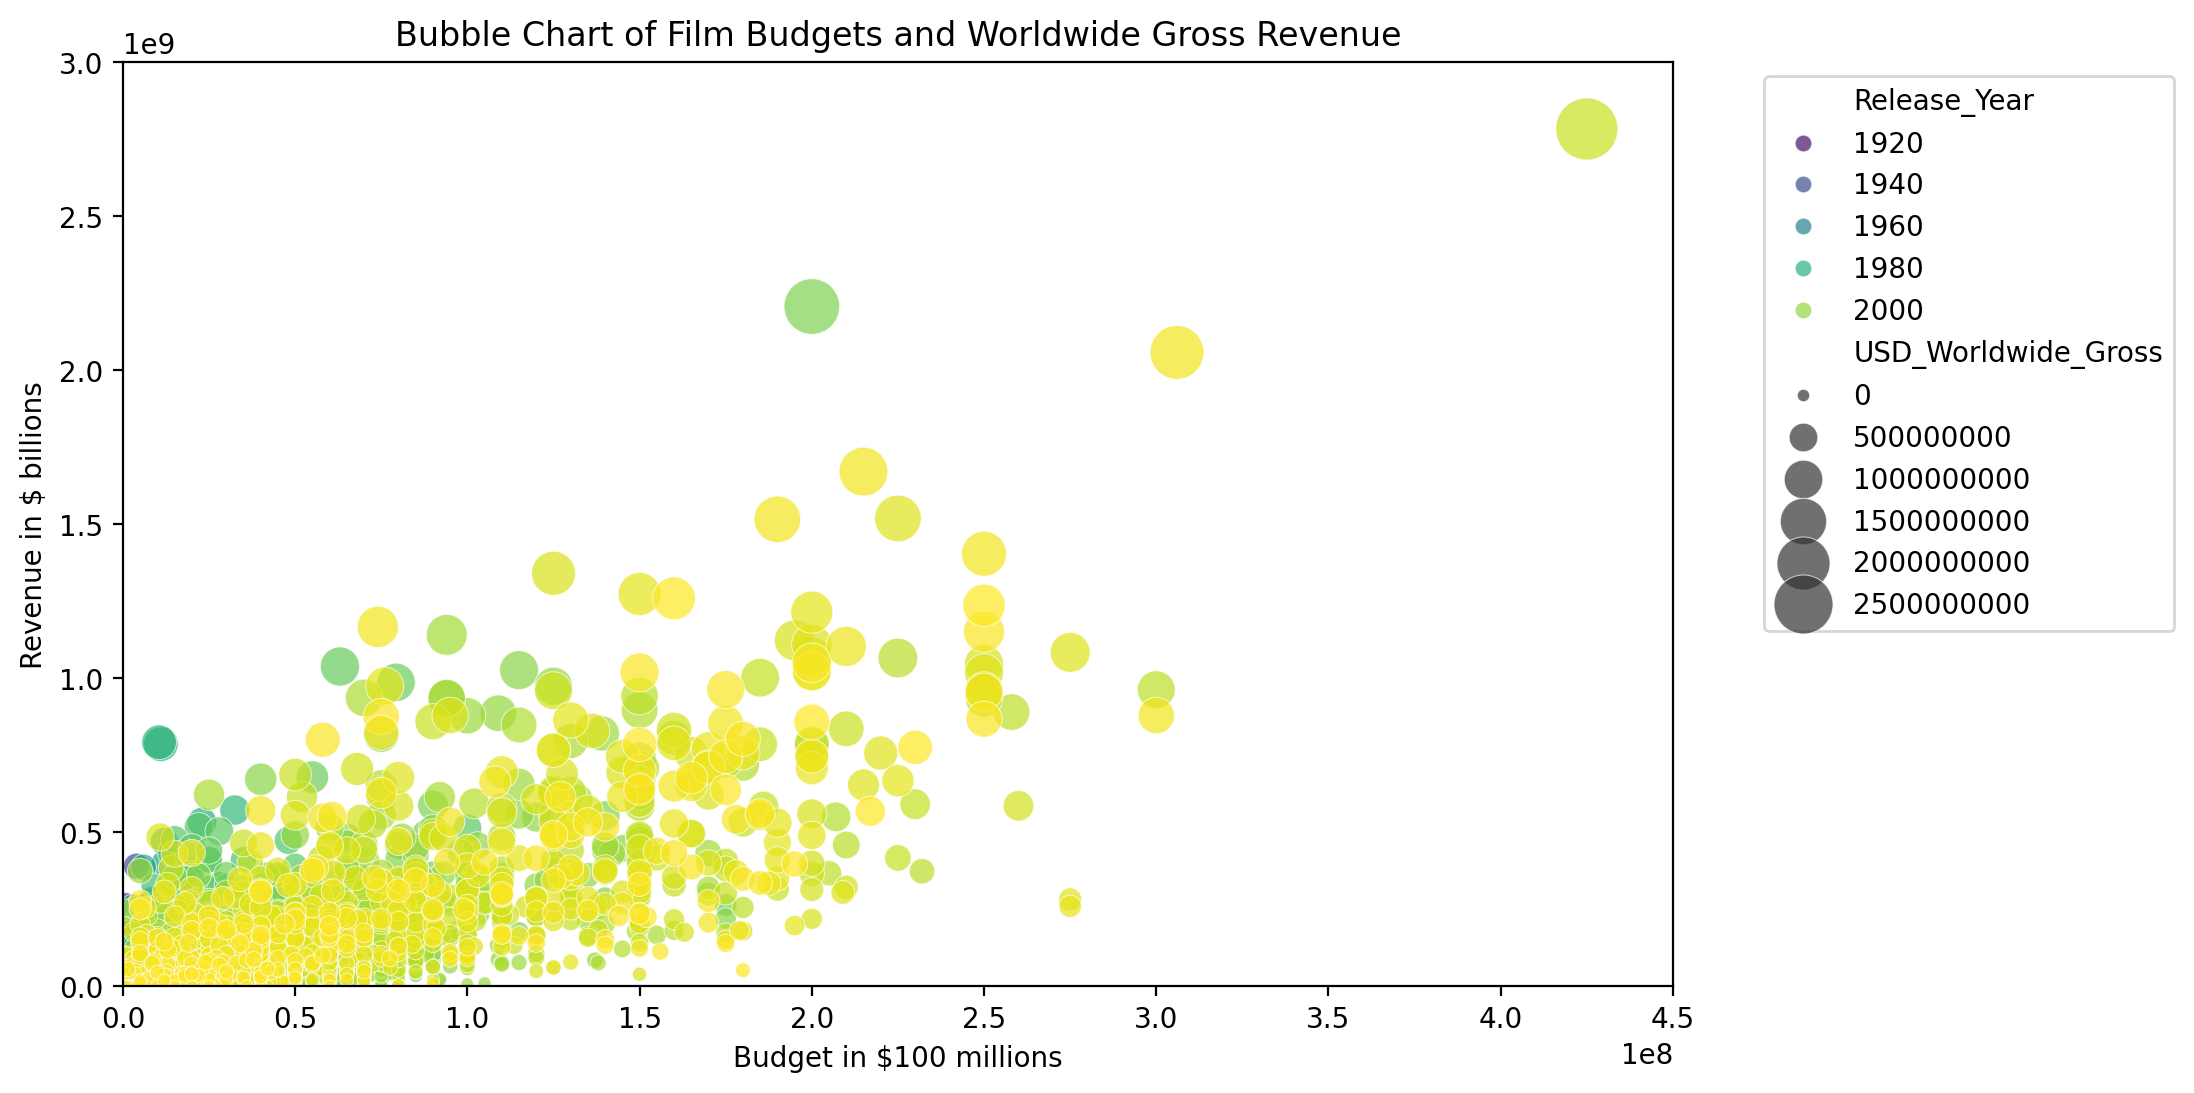

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt


# Convert Release_Date to year for visualization
data_clean['Release_Year'] = data_clean['Release_Date'].dt.year

plt.figure(figsize=(10, 6), dpi=200)

# Create the bubble chart
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget',
                     y='USD_Worldwide_Gross',
                     hue='Release_Year',  # Colour based on release year
                     size='USD_Worldwide_Gross',  # Size based on worldwide gross
                     sizes=(20, 500),  # Set the range for bubble sizes
                     alpha=0.7,  # Set transparency for better visibility
                     palette='viridis')  # Choose a color palette

# Set the limits and labels
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',
       title='Bubble Chart of Film Budgets and Worldwide Gross Revenue')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



<ipython-input-37-27cd3b5c9e08>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Release_Year'] = data_clean['Release_Date'].dt.year


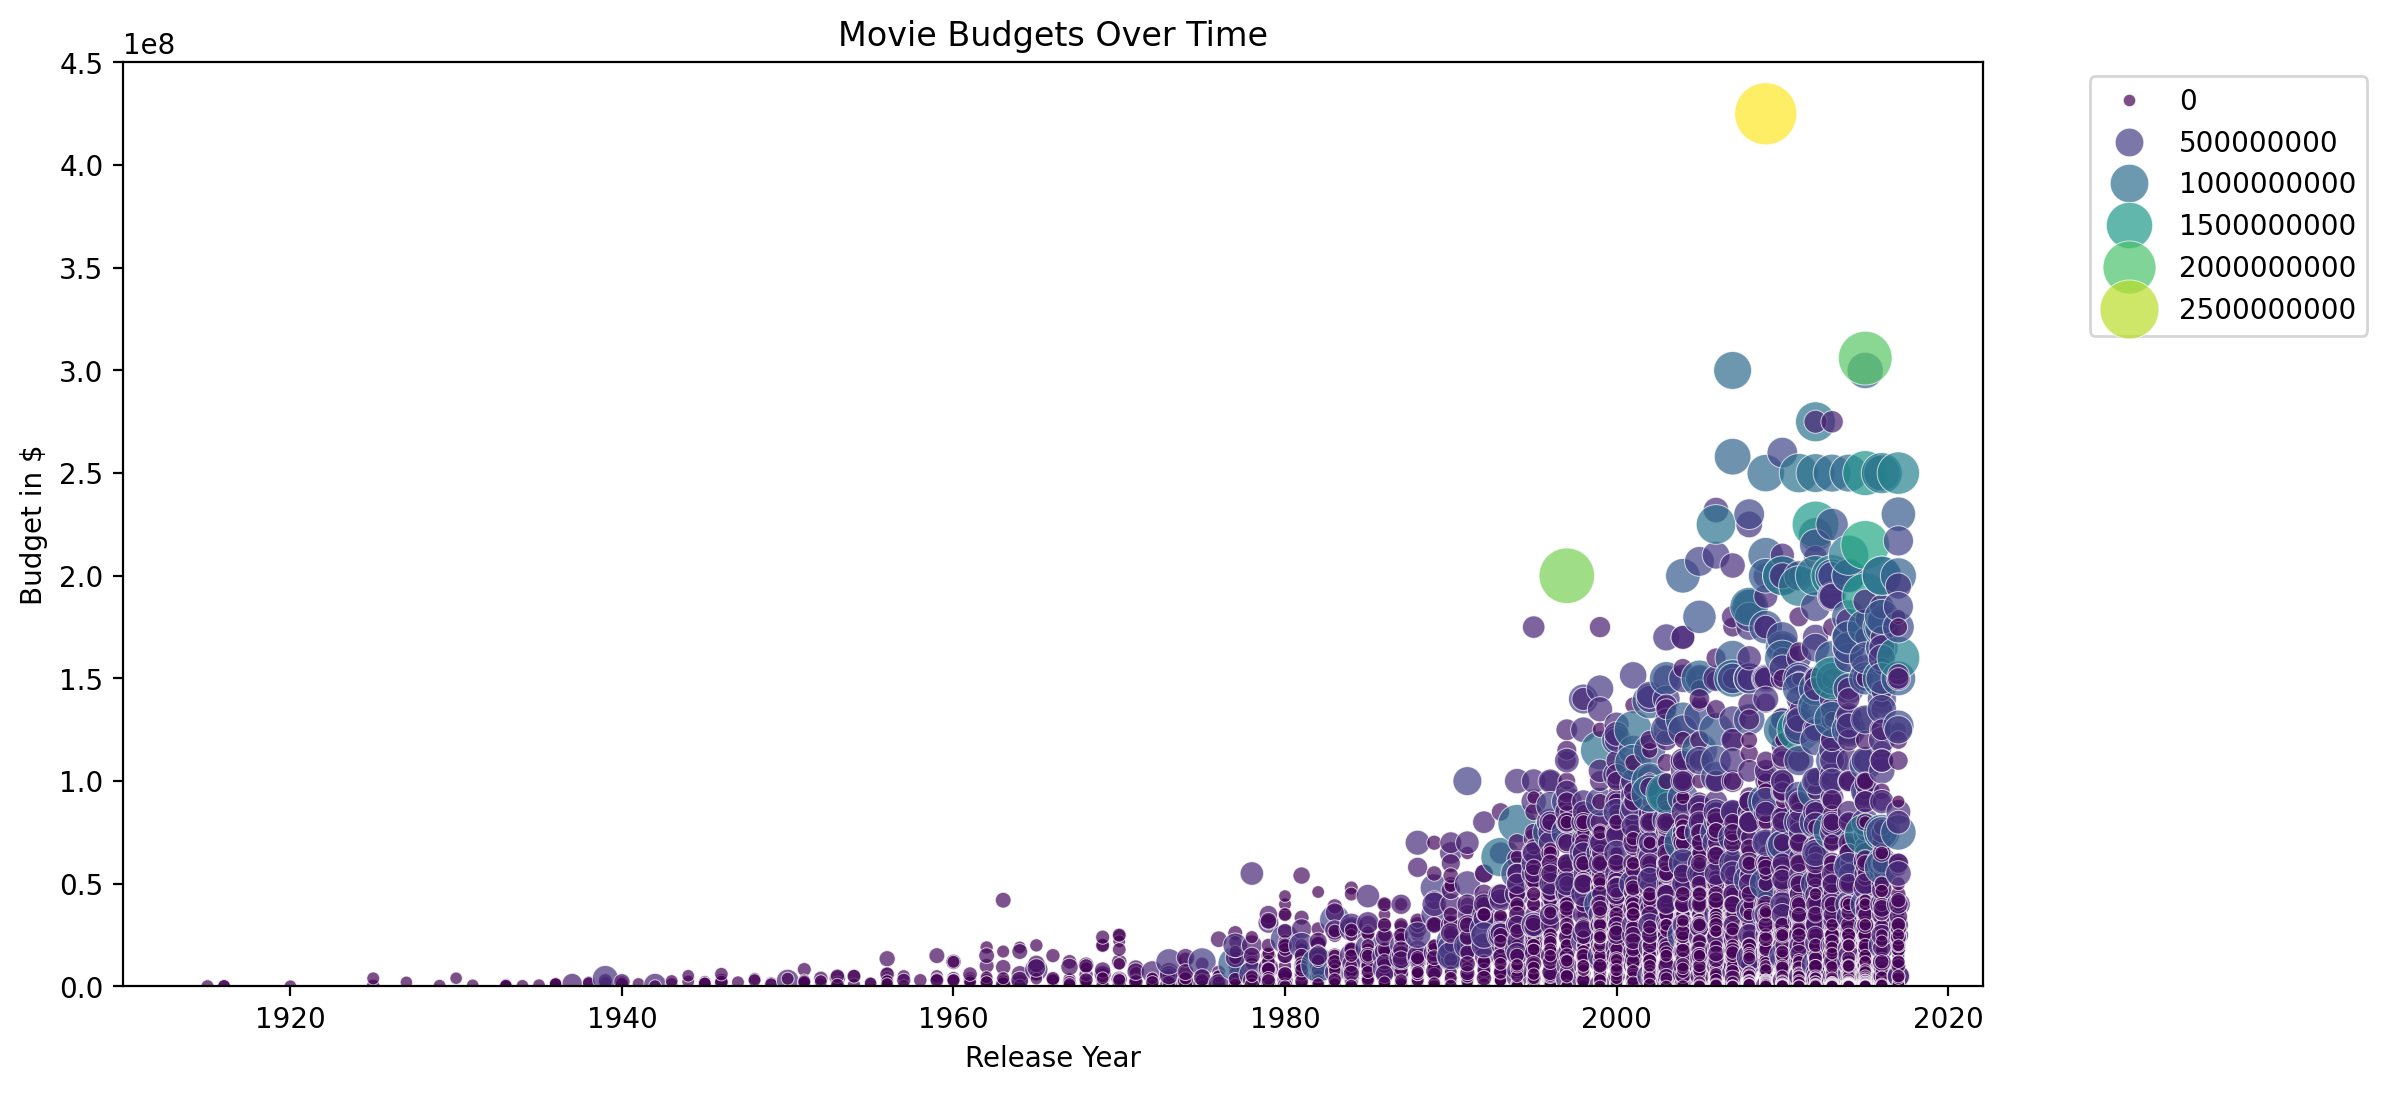

In [37]:
# Ensure the Release_Date is in datetime format and extract the year
data_clean['Release_Year'] = data_clean['Release_Date'].dt.year

plt.figure(figsize=(12, 6), dpi=200)

# Create the bubble chart
ax = sns.scatterplot(data=data_clean,
                     x='Release_Year',  # Release Year on x-axis
                     y='USD_Production_Budget',  # Production Budget on y-axis
                     hue='USD_Worldwide_Gross',  # Colour based on worldwide gross
                     size='USD_Worldwide_Gross',  # Size based on worldwide gross
                     sizes=(20, 500),  # Set the range for bubble sizes
                     alpha=0.7,  # Set transparency for better visibility
                     palette='viridis')  # Choose a color palette

# Set the limits and labels
ax.set(ylim=(0, 450000000),
       ylabel='Budget in $',
       xlabel='Release Year',
       title='Movie Budgets Over Time')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release.

<img src=https://i.imgur.com/0VEfagw.png width=650>

Here's how:
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column.
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [38]:
# Create a DatetimeIndex object from the Release_Date column
release_dates = pd.DatetimeIndex(data_clean['Release_Date'])

# Grab all the years from the DatetimeIndex
years = release_dates.year

# Convert years to decades using floor division
decades = (years // 10) * 10  # e.g., 1992 -> 1990

# Add the decades as a new column to the data_clean DataFrame
data_clean['Decade'] = decades

# Optionally, display the updated DataFrame to verify the new column
print(data_clean[['Release_Date', 'Decade']].head())


  Release_Date  Decade
0   1915-08-02    1910
1   1916-05-09    1910
2   1916-12-24    1910
3   1920-09-17    1920
4   1925-01-01    1920


<ipython-input-38-6b5cae8d4de1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Decade'] = decades


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [39]:
# Create old_films DataFrame for films released before 1970
old_films = data_clean[data_clean['Release_Date'] < '1970-01-01']

# Create new_films DataFrame for films released from 1970 onwards
new_films = data_clean[data_clean['Release_Date'] >= '1970-01-01']

# Count of films released prior to 1970
old_films_count = old_films.shape[0]
print(f'Number of films released prior to 1970: {old_films_count}')

# Find the most expensive film made prior to 1970
most_expensive_old_film = old_films.loc[old_films['USD_Production_Budget'].idxmax()]

print('Most expensive film made prior to 1970:')
print(f"Title: {most_expensive_old_film['Movie_Title']}")
print(f"Budget: ${most_expensive_old_film['USD_Production_Budget']:,.2f}")


Number of films released prior to 1970: 153
Most expensive film made prior to 1970:
Title: Cleopatra
Budget: $42,000,000.00


# Seaborn Regression Plots

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`.
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

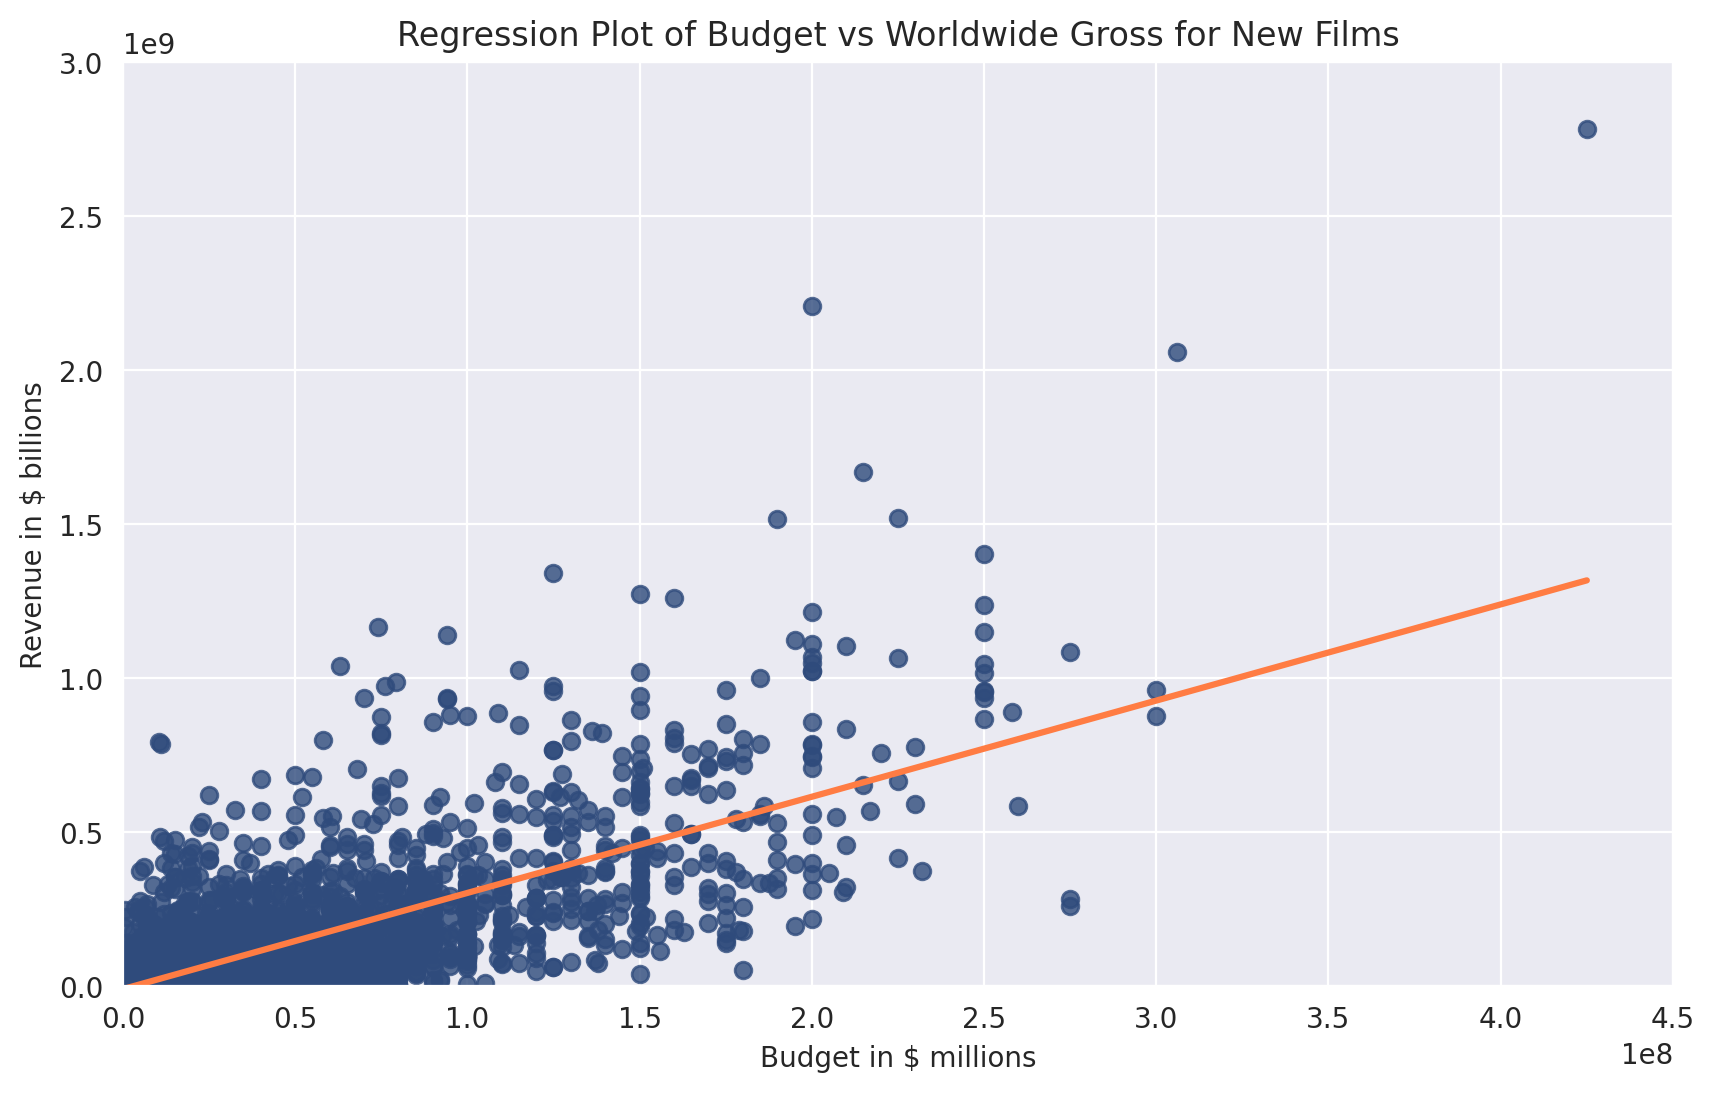

In [40]:
# Set the style to darkgrid
sns.set_style('darkgrid')

# Create the regression plot
plt.figure(figsize=(10, 6), dpi=200)

# Create the regplot
ax = sns.regplot(data=new_films,
                 x='USD_Production_Budget',
                 y='USD_Worldwide_Gross',
                 scatter_kws={'color': '#2f4b7c'},  # Dark blue for the dots
                 line_kws={'color': '#ff7c43'},     # Orange for the regression line
                 ci=None)  # Disable confidence interval for clarity

# Set limits for the axes
ax.set(xlim=(0, 450000000), ylim=(0, 3000000000),
       xlabel='Budget in $ millions',
       ylabel='Revenue in $ billions',
       title='Regression Plot of Budget vs Worldwide Gross for New Films')

plt.show()

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [41]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Prepare the data
X = old_films[['USD_Production_Budget']]  # Feature: Budget
y = old_films['USD_Worldwide_Gross']      # Target: Revenue

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the intercept and slope
intercept = model.intercept_
slope = model.coef_[0]

# Predict revenue to calculate R-squared
y_pred = model.predict(X)
r_squared = r2_score(y, y_pred)

# Output the results
print(f'Intercept (θ₀): {intercept:.2f}')
print(f'Slope (θ₁): {slope:.2f}')
print(f'R-squared: {r_squared:.4f}')

# Calculate the percentage of variance explained
variance_explained = r_squared * 100
print(f'Percentage of variance explained by the model: {variance_explained:.2f}%')


Intercept (θ₀): 22821538.64
Slope (θ₁): 1.65
R-squared: 0.0294
Percentage of variance explained by the model: 2.94%


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million?